<a href="https://colab.research.google.com/github/shiling2007/Python-/blob/main/scipy_solve_differential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://github.com/APMonitor/pdc/blob/master/Solve_ODEs_with_scipy.ipynb

from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:100% !important; }</style>"))
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# from google.colab import drive
# drive.mount('/content/drive')
# from google.colab import files
# files.download('/content/drive/MyDrive/Colab Notebooks/Lease Payment Formula.ipynb') 
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 999)
pd.set_option("max_colwidth", 500)
# try:
#  device_name = os.environ['COLAB_TPU_ADDR']
#  TPU_ADDRESS = 'grpc://' + device_name
#  print('Found TPU at: {}'.format(TPU_ADDRESS))
# except KeyError:
#  print('TPU not found')
%load_ext autoreload
%autoreload 2

In [ ]:
!apt install octave

In [ ]:
!apt-get update

In [ ]:
%%writefile DiscreteSpectrumExampleFn.m
function X = DiscreteSpectrumExampleFn(x1range, x2range, numICs, tSpan, mu, lambda, seed)

% Koopman example from 3.4.2 (pg 51) of the DMD book
% (Dynamic Mode Decomposition by Kutz, Brunton, Brunton, and Proctor)
% nonlinear dynamical system in two variables, but with 3D Koopman
% observables, have linear dynamical system

% try some initial conditions for x1, x2
# rng(seed)

% randomly start from x1range(1) to x1range(2)
x1 = (x1range(2)-x1range(1))*rand([numICs,1])+x1range(1);

% randomly start from x2range(1) to x2range(2)
x2 = (x2range(2)-x2range(1))*rand([numICs,1])+x2range(1);

lenT = length(tSpan);

X = zeros(numICs*lenT, 2);

count = 1;
% in order to solve more accurately than ode45, map into 3D linear system
% and use exact analytic solution 
for j = 1:numICs
    Y0 = [2; 0; 2^2];
    c1 = Y0(1);
    c2 = Y0(2) + (lambda*Y0(3))/(2*mu-lambda);
    c3 = (-lambda*Y0(3))/(2*mu-lambda);
    c4 = Y0(3);
    Y = [c1 * exp(mu*tSpan);
        c2 * exp(lambda*tSpan) + c3 * exp(2*mu*tSpan);
        c4 * exp(2*mu*tSpan)];

    Xhat = Y(1:2,:);
    X(1+(count-1)*lenT : lenT + (count-1)*lenT,:) = Xhat(:,1:lenT)';
    count = count + 1;
end


Overwriting DiscreteSpectrumExampleFn.m


In [ ]:
%%writefile DiscreteSpectrumExample.m

numICs = 1;
filenamePrefix = 'DiscreteSpectrumExample';

x1range = [-.5, .5];
x2range = x1range;
tSpan = 0:0.02:20;
mu = -0.05;
lambda = -1;

seed = 1;
X_test = DiscreteSpectrumExampleFn(x1range, x2range, round(1*numICs), tSpan, mu, lambda, seed);
filename_test = strcat(filenamePrefix, '_test_x.csv');
dlmwrite(filename_test, X_test, 'precision', '%.14f')


Overwriting DiscreteSpectrumExample.m


In [ ]:
!octave -W DiscreteSpectrumExample.m

In [ ]:
ls -lt

total 48
-rw-r--r-- 1 root root 34034 Jan 28 02:39 DiscreteSpectrumExample_test_x.csv
-rw-r--r-- 1 root root   357 Jan 28 02:39 DiscreteSpectrumExample.m
-rw-r--r-- 1 root root  1153 Jan 28 02:39 DiscreteSpectrumExampleFn.m
drwxr-xr-x 1 root root  4096 Jan  7 14:33 sample_data/


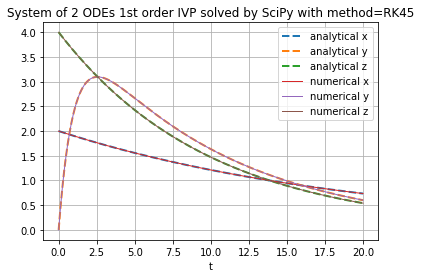

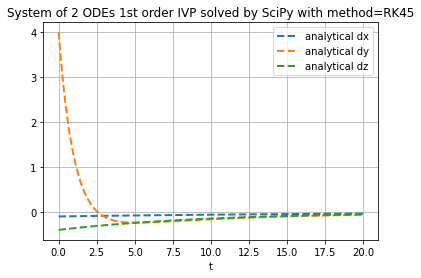

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

def ode_sys(t, XY):
  x=XY[0]
  y=XY[1]
  mu=-0.05
  lam=-1
  dx_dt= mu*x
  dy_dt= lam *(y - x**2) 
  return [dx_dt, dy_dt]

t_begin=0.
t_end=20.
t_nsamples=1000

mu=-0.05
lam=-1.
t_space = np.linspace(t_begin, t_end, t_nsamples)
x_init = 2.
y_init = 0.

c1=x_init
c2=y_init + (lam*x_init**2.)/(2.*mu-lam)
c3=(-lam*x_init**2.)/(2.*mu-lam)
c4=x_init**2.

an_sol_x = lambda t : c1 * np.exp(mu*t)
an_sol_y = lambda t : c2 * np.exp(lam*t) + c3 * np.exp(2*mu*t)
an_sol_z = lambda t : c4 * np.exp(2*mu*t)

dx1 = lambda t : mu*c1 * np.exp(mu*t)
dy1 = lambda t : lam * c2 * np.exp(lam*t) + 2*mu * c3 * np.exp(2*mu*t)
dz1 = lambda t : 2*mu * c4 * np.exp(2*mu*t)

x_an_sol = an_sol_x(t_space)
y_an_sol = an_sol_y(t_space)
z_an_sol = an_sol_z(t_space)

dx = dx1(t_space)
dy = dy1(t_space)
dz = dz1(t_space)

    # Y0 = [2; 0; 2^2];
    # c1 = Y0(1);
    # c2 = Y0(2) + (lambda*Y0(3))/(2*mu-lambda);
    # c3 = (-lambda*Y0(3))/(2*mu-lambda);
    # c4 = Y0(3);
    # Y = [c1 * exp(mu*tSpan);
    #     c2 * exp(lambda*tSpan) + c3 * exp(2*mu*tSpan);
    #     c4 * exp(2*mu*tSpan)];

method = 'RK45' #available methods: 'RK45', 'RK23', 'DOP853', 'Radau', 'BDF', 'LSODA'
num_sol = solve_ivp(ode_sys, [t_begin, t_end], [x_init, y_init], method=method, dense_output=True)
XY_num_sol = num_sol.sol(t_space)
x_num_sol = XY_num_sol[0].T
y_num_sol = XY_num_sol[1].T

plt.figure()
plt.plot(t_space, x_an_sol, '--', linewidth=2, label='analytical x')
plt.plot(t_space, y_an_sol, '--', linewidth=2, label='analytical y')
plt.plot(t_space, z_an_sol, '--', linewidth=2, label='analytical z')
plt.plot(t_space, x_num_sol, linewidth=1, label='numerical x')
plt.plot(t_space, y_num_sol, linewidth=1, label='numerical y')
plt.plot(t_space, x_num_sol**2, linewidth=1, label='numerical z')
plt.title('System of 2 ODEs 1st order IVP solved by SciPy with method=' + method)
plt.xlabel('t')
plt.legend()
plt.grid()
plt.show()


plt.plot(t_space, dx, '--', linewidth=2, label='analytical dx')
plt.plot(t_space, dy, '--', linewidth=2, label='analytical dy')
plt.plot(t_space, dz, '--', linewidth=2, label='analytical dz')
plt.title('System of 2 ODEs 1st order IVP solved by SciPy with method=' + method)
plt.xlabel('t')
plt.legend()
plt.grid()
plt.show()


In [ ]:
df2_var_solution=pd.DataFrame(np.c_[x_num_sol, y_num_sol, x_an_sol,y_an_sol, dx, dy], columns=['x2','y2','x_true','y_true','dx','dy'])
df2_var_solution

,x2,y2,x_true,y_true,dx,dy
0,2.000000,0.000000,2.000000,0.000000,-0.100000,4.000000
1,1.997999,0.079204,1.997999,0.079204,-0.099900,3.912796
2,1.996000,0.156680,1.996000,0.156680,-0.099800,3.827336
3,1.994003,0.232463,1.994003,0.232462,-0.099700,3.743586
4,1.992008,0.306586,1.992008,0.306585,-0.099600,3.661511
...,...,...,...,...,...,...
995,0.738711,0.606671,0.738711,0.606326,-0.036936,-0.060633
996,0.737972,0.605451,0.737972,0.605114,-0.036899,-0.060511
997,0.737233,0.604234,0.737233,0.603903,-0.036862,-0.060390
998,0.736496,0.603020,0.736496,0.602696,-0.036825,-0.060270


In [ ]:
df_m=pd.read_csv('DiscreteSpectrumExample_test_x.csv', header=None)
df_m2 = df_m.head(1000)
df_m2.columns=['xm','ym']
df_m2

,xm,ym
0,2.000000,0.000000
1,1.998001,0.079126
2,1.996004,0.156527
3,1.994009,0.232237
4,1.992016,0.306291
...,...,...
995,0.739447,0.607535
996,0.738708,0.606321
997,0.737969,0.605110
998,0.737232,0.603901


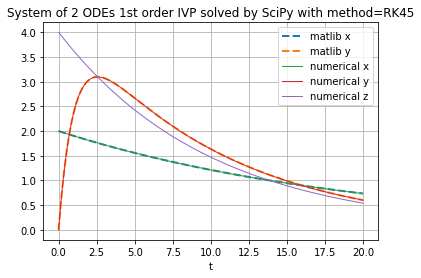

In [ ]:
plt.figure()
plt.plot(t_space, df_m2.xm, '--', linewidth=2, label='matlib x')
plt.plot(t_space, df_m2.ym, '--', linewidth=2, label='matlib y')
plt.plot(t_space, x_num_sol, linewidth=1, label='numerical x')
plt.plot(t_space, y_num_sol, linewidth=1, label='numerical y')
plt.plot(t_space, x_num_sol**2, linewidth=1, label='numerical z')
plt.title('System of 2 ODEs 1st order IVP solved by SciPy with method=' + method)
plt.xlabel('t')
plt.legend()
plt.grid()
plt.show()

In [ ]:
merged=pd.concat([df2_var_solution, df_m2], axis=1)
merged['diff_x'] = df2_var_solution.x2-df_m2.xm 
merged['diff_y'] = df2_var_solution.y2-df_m2.ym 

In [ ]:
merged.describe()

,x2,y2,x_true,y_true,dx,dy,xm,ym,diff_x,diff_y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.264345,1.697875,1.264345,1.697850,-0.063217,0.032022,1.264873,1.698947,-0.000528,-0.001073
std,0.362539,0.812587,0.362539,0.812723,0.018127,0.608091,0.362334,0.812387,0.000210,0.000929
min,0.735759,0.000000,0.735759,0.000000,-0.100000,-0.239793,0.736495,0.000000,-0.000736,-0.002471
25%,0.944733,0.963308,0.944733,0.963339,-0.077880,-0.187219,0.945442,0.963902,-0.000709,-0.001701
50%,1.213061,1.551871,1.213061,1.551972,-0.060653,-0.120114,1.213668,1.553604,-0.000607,-0.001280
75%,1.557602,2.418204,1.557602,2.418600,-0.047237,-0.074630,1.557991,2.420003,-0.000389,-0.000672
max,2.000000,3.097276,2.000000,3.097052,-0.036788,4.000000,2.000000,3.097054,0.000000,0.001651
